<a href="https://colab.research.google.com/github/RachnaKandari/rachna/blob/main/House%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import calendar

from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import LabelEncoder

In [2]:
df2 = pd.read_csv("/content/test.csv")

In [3]:
df1 = pd.read_csv("/content/train.csv")

In [4]:
df1.shape

(1460, 81)

In [5]:
df2.shape

(1459, 80)

In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df1.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500

In [7]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df2.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       1961.0          Unf         1.0       730.0         TA   
1     Attchd       1958.0          Unf         1.0       312.0         TA   
2     Attchd       1997.0          Fin         2.0       482.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y         140            0              0          0   
1         TA          Y         393           36              0          0   
2         TA          Y         212           34              0          0   

   ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold  \
0          120         0    NaN  MnPrv         NaN        0       6    2010   
1            0         0    NaN    NaN        Gar2    12500       6    2010   
2            0         0    NaN  MnPrv         NaN        0       3    2010   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal

In [8]:
df = pd.concat([df1, df2])

In [9]:
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
df.shape

(2919, 81)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [12]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [13]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
# Set index as Id column
df = df.set_index("Id")

<Axes: ylabel='Id'>

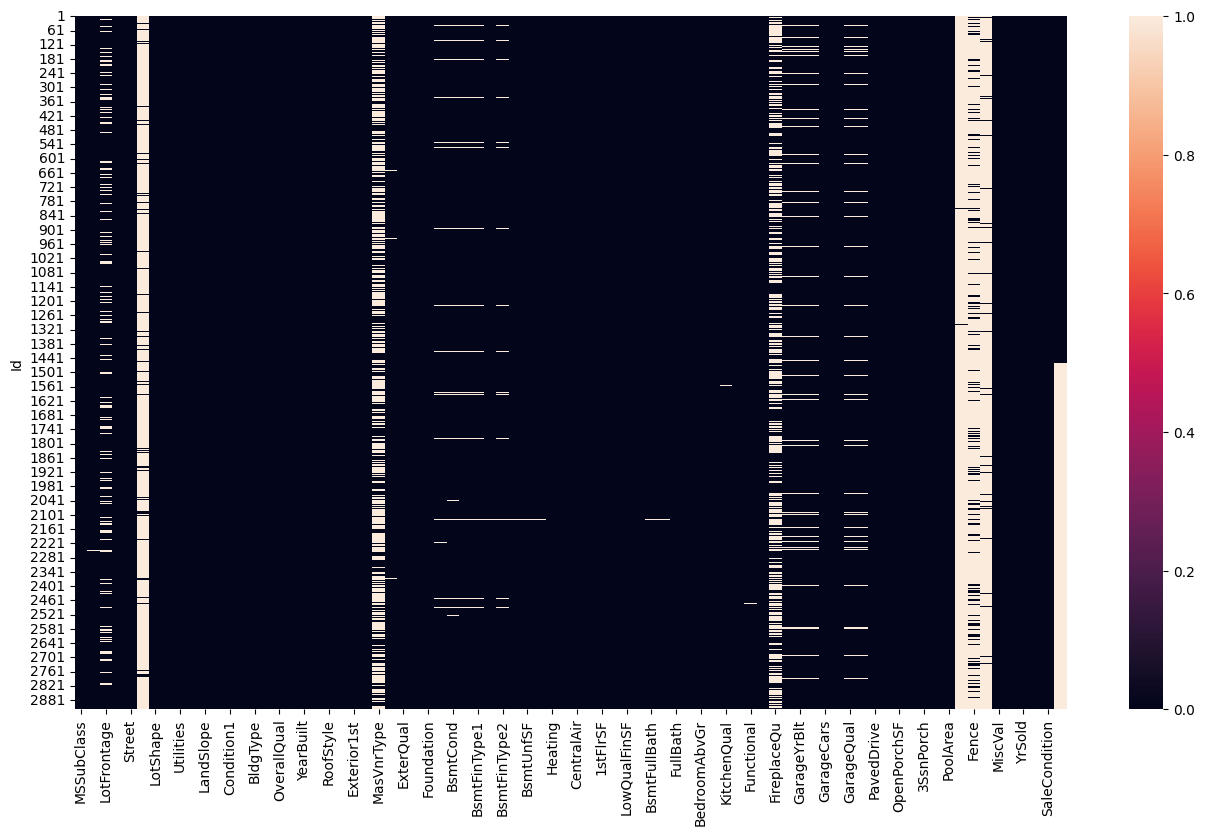

In [16]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [17]:
# Get the percentages of null value
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.034258
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.034258
TotRmsAbvGrd      0.000000
Functional        0.068517
Fireplaces        0.000000
FireplaceQu      48.646797
GarageType        5.378554
GarageYrBlt       5.447071
GarageFinish      5.447071
GarageCars        0.034258
GarageArea        0.034258
GarageQual        5.447071
GarageCond        5.447071
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
PoolQC           99.657417
Fence            80.438506
MiscFeature      96.402878
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
dtype: float64

In [18]:
col_for_drop = null_percent[null_percent > 20].keys() # if the null value % 20 or > 20 so need to drop it

In [19]:
# drop columns
df = df.drop(columns=col_for_drop) # Use the 'columns' keyword argument instead of a positional argument
df.shape

(2919, 73)

In [20]:
# find the unique value count
for i in df.columns:
    print(i + "\t" + str(len(df[i].unique())))

MSSubClass	16
MSZoning	6
LotFrontage	129
LotArea	1951
Street	2
LotShape	4
LandContour	4
Utilities	3
LotConfig	5
LandSlope	3
Neighborhood	25
Condition1	9
Condition2	8
BldgType	5
HouseStyle	8
OverallQual	10
OverallCond	9
YearBuilt	118
YearRemodAdd	61
RoofStyle	6
RoofMatl	8
Exterior1st	16
Exterior2nd	17
MasVnrArea	445
ExterQual	4
ExterCond	5
Foundation	6
BsmtQual	5
BsmtCond	5
BsmtExposure	5
BsmtFinType1	7
BsmtFinSF1	992
BsmtFinType2	7
BsmtFinSF2	273
BsmtUnfSF	1136
TotalBsmtSF	1059
Heating	6
HeatingQC	5
CentralAir	2
Electrical	6
1stFlrSF	1083
2ndFlrSF	635
LowQualFinSF	36
GrLivArea	1292
BsmtFullBath	5
BsmtHalfBath	4
FullBath	5
HalfBath	3
BedroomAbvGr	8
KitchenAbvGr	4
KitchenQual	5
TotRmsAbvGrd	14
Functional	8
Fireplaces	5
GarageType	7
GarageYrBlt	104
GarageFinish	4
GarageCars	7
GarageArea	604
GarageQual	6
GarageCond	6
PavedDrive	3
WoodDeckSF	379
OpenPorchSF	252
EnclosedPorch	183
3SsnPorch	31
ScreenPorch	121
PoolArea	14
MiscVal	38
MoSold	12
YrSold	5
SaleType	10
SaleCondition	6


In [21]:
for i in df.columns:
    print("Unique value of:>>> {} ({})\n{}\n".format(i, len(df[i].unique()), df[i].unique()))

Unique value of:>>> MSSubClass (16)
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]

Unique value of:>>> MSZoning (6)
['RL' 'RM' 'C (all)' 'FV' 'RH' nan]

Unique value of:>>> LotFrontage (129)
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]

Unique value of:>>> LotArea (1951)
[ 8450  9600 11250 ...  1894 20000 10441]

Unique value of:>>> Street (2)
['Pave' 'Grvl']

Unique

In [22]:
# Describe the target
df1["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

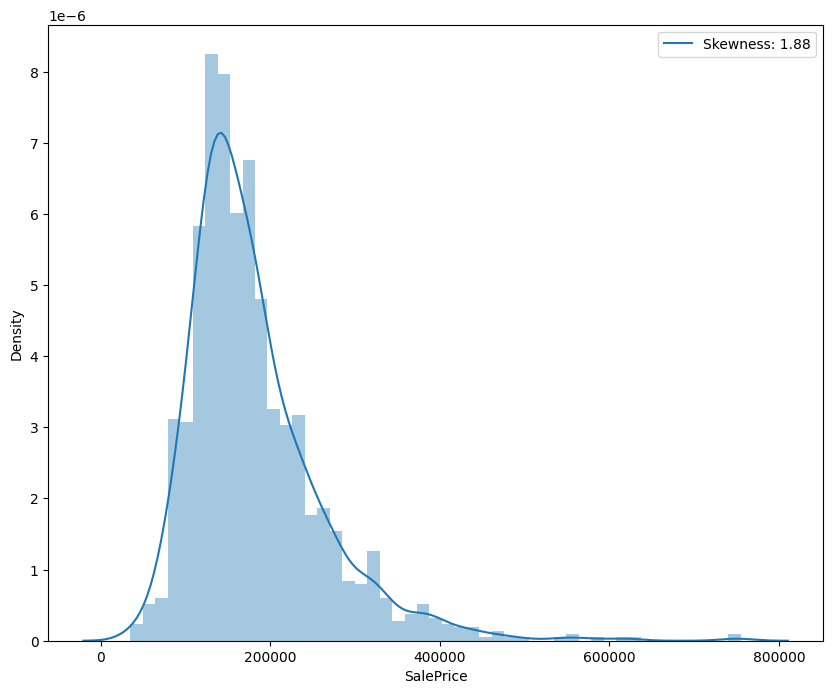

In [23]:
# Plot the distplot of target
plt.figure(figsize=(10,8))
bar = sns.distplot(df1["SalePrice"])
bar.legend(["Skewness: {:.2f}".format(df1['SalePrice'].skew())])

(38.5, -0.5)

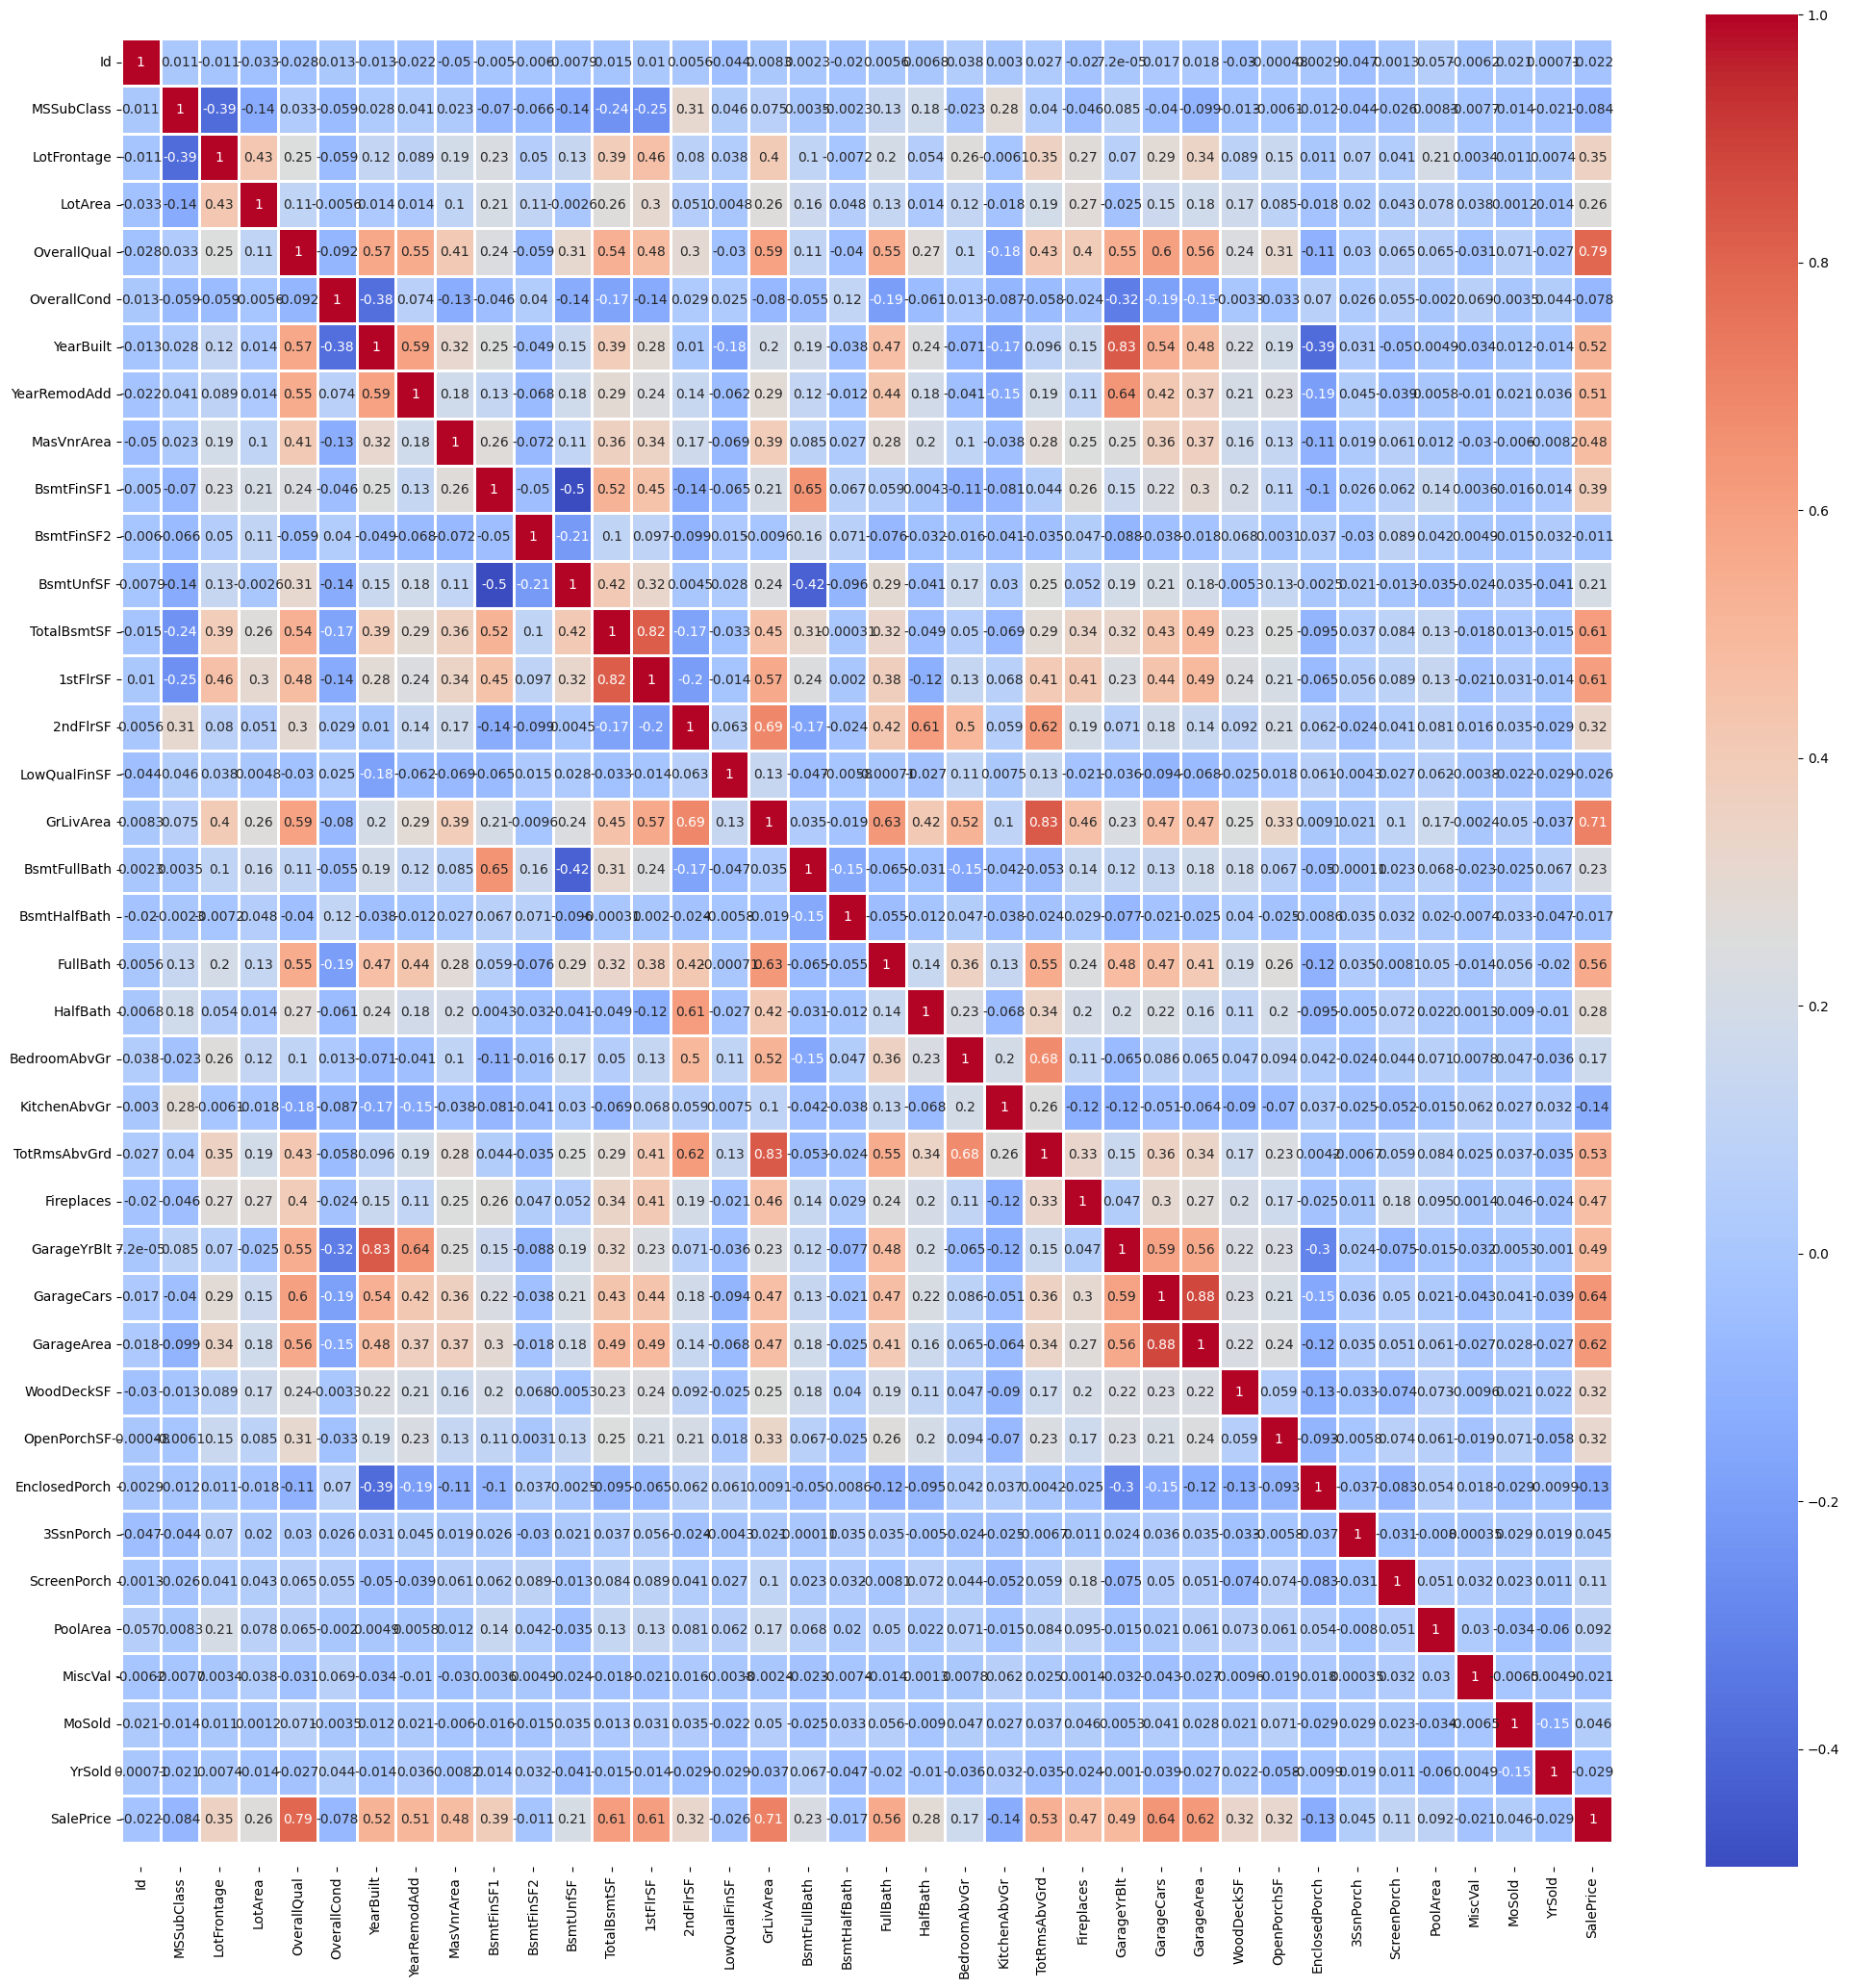

In [24]:
# correlation heatmap
plt.figure(figsize=(25,25))

# Select only numerical features for correlation calculation
numerical_df1 = df1.select_dtypes(include=['number'])

ax = sns.heatmap(numerical_df1.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [25]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = df1.select_dtypes(include=np.number).corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]
hig_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

(11.5, -0.5)

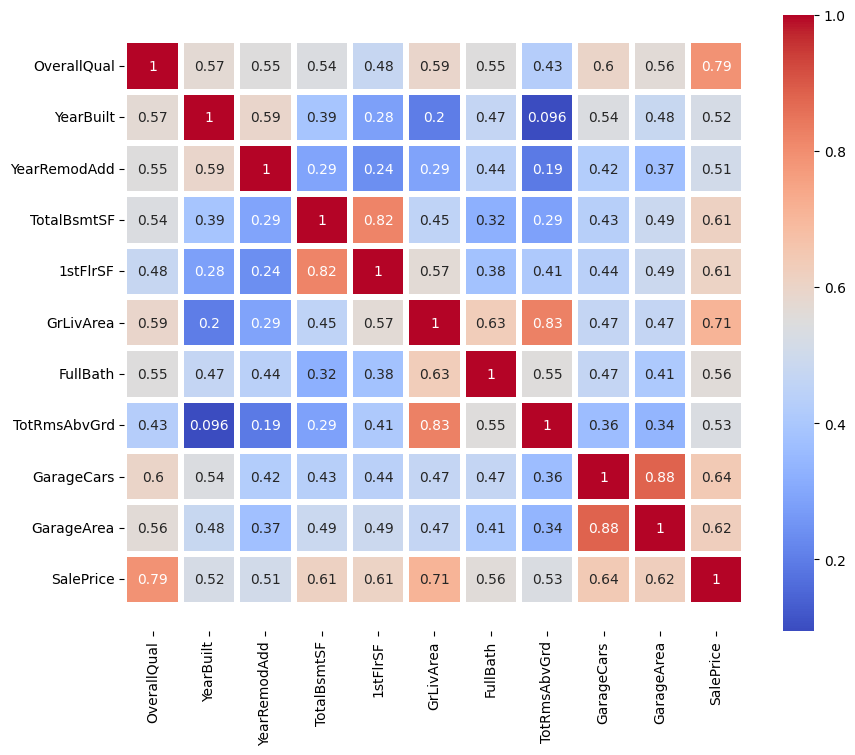

In [26]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df1[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

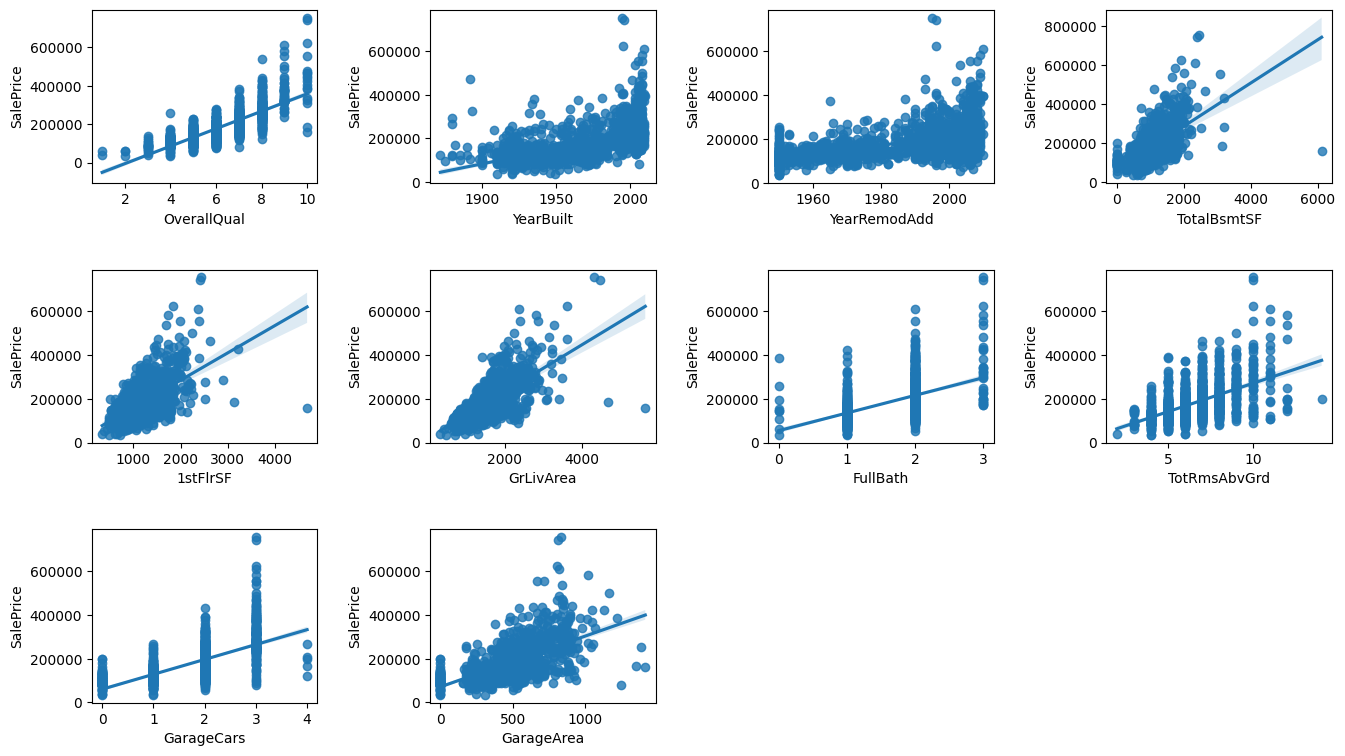

In [27]:
# Plot regplot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=df1, x = hig_corr_features[i], y = 'SalePrice')

**Handling Missing Value**

In [28]:
missing_col = df.columns[df.isnull().any()]
missing_col

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

**Handling missing value of Bsmt feature**

In [29]:
bsmt_col = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
bsmt_feat = df[bsmt_col]
bsmt_feat

BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
Id                                                                             
1          TA           No       706.0         0.0          GLQ          Unf   
2          TA           Gd       978.0         0.0          ALQ          Unf   
3          TA           Mn       486.0         0.0          GLQ          Unf   
4          Gd           No       216.0         0.0          ALQ          Unf   
5          TA           Av       655.0         0.0          GLQ          Unf   
6          TA           No       732.0         0.0          GLQ          Unf   
7          TA           Av      1369.0         0.0          GLQ          Unf   
8          TA           Mn       859.0        32.0          ALQ          BLQ   
9          TA           No         0.0         0.0          Unf          Unf   
10         TA           No       851.0         0.0          GLQ          Unf   
11         TA           No       906.0         0.0          Rec          Unf   
12         TA           No       998.0         0.0          GLQ          Unf   
13         TA           No       737.0         0.0          ALQ          Unf   
14         TA           Av         0.0         0.0          Unf          Unf   
15         TA           No       733.0         0.0          BLQ          Unf   
16         TA           No         0.0         0.0          Unf          Unf   
17         TA           No       578.0         0.0          ALQ          Unf   
18        NaN          NaN         0.0         0.0          NaN          NaN   
19         TA           No       646.0         0.0          GLQ          Unf   
20         TA           No       504.0         0.0          LwQ          Unf   
21         TA           Av         0.0         0.0          Unf          Unf   
22         TA           No         0.0         0.0          Unf          Unf   
23         TA           No         0.0         0.0          Unf          Unf   
24         TA           No       840.0         0.0          GLQ          Unf   
25         TA           Mn       188.0       668.0          Rec          ALQ   
26         TA           No         0.0         0.0          Unf          Unf   
27         TA           Mn       234.0       486.0          BLQ          Rec   
28         TA           No      1218.0         0.0          GLQ          Unf   
29         TA           Gd      1277.0         0.0          BLQ          Unf   
30         TA           No         0.0         0.0          Unf          Unf   
31         TA           No         0.0         0.0          Unf          Unf   
32         TA           No         0.0         0.0          Unf          Unf   
33         TA           Av         0.0         0.0          Unf          Unf   
34         TA           No      1018.0         0.0          Rec          Unf   
35         TA           No      1153.0         0.0          GLQ          Unf   
36         TA           Av         0.0         0.0          Unf          Unf   
37         TA           No         0.0         0.0          Unf          Unf   
38         TA           No      1213.0         0.0          Rec          Unf   
39         TA           No       731.0         0.0          GLQ          Unf   
40        NaN          NaN         0.0         0.0          NaN          NaN   
41         TA           No       643.0         0.0          Rec          Unf   
42         TA           Gd       967.0         0.0          BLQ          Unf   
43         TA           Av       747.0        93.0          ALQ          LwQ   
44         TA           Av       280.0       491.0          LwQ          BLQ   
45         TA           No       179.0       506.0          ALQ          BLQ   
46         TA           No       456.0         0.0          GLQ          Unf   
47         TA           No      1351.0         0.0          GLQ          Unf   
48         TA           Av        24.0         0.0          GLQ          Unf   
49   

In [30]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtCond      2837 non-null   object 
 1   BsmtExposure  2837 non-null   object 
 2   BsmtFinSF1    2918 non-null   float64
 3   BsmtFinSF2    2918 non-null   float64
 4   BsmtFinType1  2840 non-null   object 
 5   BsmtFinType2  2839 non-null   object 
 6   BsmtFullBath  2917 non-null   float64
 7   BsmtHalfBath  2917 non-null   float64
 8   BsmtQual      2838 non-null   object 
 9   BsmtUnfSF     2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
dtypes: float64(6), object(5)
memory usage: 273.7+ KB


In [31]:
bsmt_feat.isnull().sum()

BsmtCond        82
BsmtExposure    82
BsmtFinSF1       1
BsmtFinSF2       1
BsmtFinType1    79
BsmtFinType2    80
BsmtFullBath     2
BsmtHalfBath     2
BsmtQual        81
BsmtUnfSF        1
TotalBsmtSF      1
dtype: int64

In [32]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]
bsmt_feat

BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
Id                                                                             
18        NaN          NaN         0.0         0.0          NaN          NaN   
40        NaN          NaN         0.0         0.0          NaN          NaN   
91        NaN          NaN         0.0         0.0          NaN          NaN   
103       NaN          NaN         0.0         0.0          NaN          NaN   
157       NaN          NaN         0.0         0.0          NaN          NaN   
183       NaN          NaN         0.0         0.0          NaN          NaN   
260       NaN          NaN         0.0         0.0          NaN          NaN   
333        TA           No      1124.0       479.0          GLQ          NaN   
343       NaN          NaN         0.0         0.0          NaN          NaN   
363       NaN          NaN         0.0         0.0          NaN          NaN   
372       NaN          NaN         0.0         0.0          NaN          NaN   
393       NaN          NaN         0.0         0.0          NaN          NaN   
521       NaN          NaN         0.0         0.0          NaN          NaN   
533       NaN          NaN         0.0         0.0          NaN          NaN   
534       NaN          NaN         0.0         0.0          NaN          NaN   
554       NaN          NaN         0.0         0.0          NaN          NaN   
647       NaN          NaN         0.0         0.0          NaN          NaN   
706       NaN          NaN         0.0         0.0          NaN          NaN   
737       NaN          NaN         0.0         0.0          NaN          NaN   
750       NaN          NaN         0.0         0.0          NaN          NaN   
779       NaN          NaN         0.0         0.0          NaN          NaN   
869       NaN          NaN         0.0         0.0          NaN          NaN   
895       NaN          NaN         0.0         0.0          NaN          NaN   
898       NaN          NaN         0.0         0.0          NaN          NaN   
949        TA          NaN         0.0         0.0          Unf          Unf   
985       NaN          NaN         0.0         0.0          NaN          NaN   
1001      NaN          NaN         0.0         0.0          NaN          NaN   
1012      NaN          NaN         0.0         0.0          NaN          NaN   
1036      NaN          NaN         0.0         0.0          NaN          NaN   
1046      NaN          NaN         0.0         0.0          NaN          NaN   
1049      NaN          NaN         0.0         0.0          NaN          NaN   
1050      NaN          NaN         0.0         0.0          NaN          NaN   
1091      NaN          NaN         0.0         0.0          NaN          NaN   
1180      NaN          NaN         0.0         0.0          NaN          NaN   
1217      NaN          NaN         0.0         0.0          NaN          NaN   
1219      NaN          NaN         0.0         0.0          NaN          NaN   
1233      NaN          NaN         0.0         0.0          NaN          NaN   
1322      NaN          NaN         0.0         0.0          NaN          NaN   
1413      NaN          NaN         0.0         0.0          NaN          NaN   
1488       TA          NaN         0.0         0.0          Unf          Unf   
1586      NaN          NaN         0.0         0.0          NaN          NaN   
1594      NaN          NaN         0.0         0.0          NaN          NaN   
1730      NaN          NaN         0.0         0.0          NaN          NaN   
1779      NaN          NaN         0.0         0.0          NaN          NaN   
1815      NaN          NaN         0.0         0.0          NaN          NaN   
1848      NaN          NaN         0.0         0.0          NaN          NaN   
1849      NaN          NaN         0.0         0.0          NaN          NaN   
1857      NaN          NaN         0.0         0.0          NaN          NaN   
1858 

In [33]:
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull() | bsmt_feat.isin([0])).all(1)]
bsmt_feat_all_nan

BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
Id                                                                             
18        NaN          NaN         0.0         0.0          NaN          NaN   
40        NaN          NaN         0.0         0.0          NaN          NaN   
91        NaN          NaN         0.0         0.0          NaN          NaN   
103       NaN          NaN         0.0         0.0          NaN          NaN   
157       NaN          NaN         0.0         0.0          NaN          NaN   
183       NaN          NaN         0.0         0.0          NaN          NaN   
260       NaN          NaN         0.0         0.0          NaN          NaN   
343       NaN          NaN         0.0         0.0          NaN          NaN   
363       NaN          NaN         0.0         0.0          NaN          NaN   
372       NaN          NaN         0.0         0.0          NaN          NaN   
393       NaN          NaN         0.0         0.0          NaN          NaN   
521       NaN          NaN         0.0         0.0          NaN          NaN   
533       NaN          NaN         0.0         0.0          NaN          NaN   
534       NaN          NaN         0.0         0.0          NaN          NaN   
554       NaN          NaN         0.0         0.0          NaN          NaN   
647       NaN          NaN         0.0         0.0          NaN          NaN   
706       NaN          NaN         0.0         0.0          NaN          NaN   
737       NaN          NaN         0.0         0.0          NaN          NaN   
750       NaN          NaN         0.0         0.0          NaN          NaN   
779       NaN          NaN         0.0         0.0          NaN          NaN   
869       NaN          NaN         0.0         0.0          NaN          NaN   
895       NaN          NaN         0.0         0.0          NaN          NaN   
898       NaN          NaN         0.0         0.0          NaN          NaN   
985       NaN          NaN         0.0         0.0          NaN          NaN   
1001      NaN          NaN         0.0         0.0          NaN          NaN   
1012      NaN          NaN         0.0         0.0          NaN          NaN   
1036      NaN          NaN         0.0         0.0          NaN          NaN   
1046      NaN          NaN         0.0         0.0          NaN          NaN   
1049      NaN          NaN         0.0         0.0          NaN          NaN   
1050      NaN          NaN         0.0         0.0          NaN          NaN   
1091      NaN          NaN         0.0         0.0          NaN          NaN   
1180      NaN          NaN         0.0         0.0          NaN          NaN   
1217      NaN          NaN         0.0         0.0          NaN          NaN   
1219      NaN          NaN         0.0         0.0          NaN          NaN   
1233      NaN          NaN         0.0         0.0          NaN          NaN   
1322      NaN          NaN         0.0         0.0          NaN          NaN   
1413      NaN          NaN         0.0         0.0          NaN          NaN   
1586      NaN          NaN         0.0         0.0          NaN          NaN   
1594      NaN          NaN         0.0         0.0          NaN          NaN   
1730      NaN          NaN         0.0         0.0          NaN          NaN   
1779      NaN          NaN         0.0         0.0          NaN          NaN   
1815      NaN          NaN         0.0         0.0          NaN          NaN   
1848      NaN          NaN         0.0         0.0          NaN          NaN   
1849      NaN          NaN         0.0         0.0          NaN          NaN   
1857      NaN          NaN         0.0         0.0          NaN          NaN   
1858      NaN          NaN         0.0         0.0          NaN          NaN   
1859      NaN          NaN         0.0         0.0          NaN          NaN   
1861      NaN          NaN         0.0         0.0          NaN          NaN   
1916 

In [34]:
bsmt_feat_all_nan.shape

(79, 11)

In [35]:
qual = list(df.loc[:, df.dtypes == 'object'].columns.values)
qual

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [36]:
# Fillinf the mising value in bsmt features
for i in bsmt_col:
    if i in qual:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan, 'NA') # replace the NAN value by 'NA'
    else:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan, 0) # replace the NAN value inplace of 0

bsmt_feat.update(bsmt_feat_all_nan) # update bsmt_feat df by bsmt_feat_all_nan
df.update(bsmt_feat_all_nan) # update df by bsmt_feat_all_nan

"""
>>> df = pd.DataFrame({'A': [1, 2, 3],
...                    'B': [400, 500, 600]})
>>> new_df = pd.DataFrame({'B': [4, 5, 6],
...                        'C': [7, 8, 9]})
>>> df.update(new_df)
>>> df
   A  B
0  1  4
1  2  5
2  3  6
"""

"\n>>> df = pd.DataFrame({'A': [1, 2, 3],\n...                    'B': [400, 500, 600]})\n>>> new_df = pd.DataFrame({'B': [4, 5, 6],\n...                        'C': [7, 8, 9]})\n>>> df.update(new_df)\n>>> df\n   A  B\n0  1  4\n1  2  5\n2  3  6\n"

In [37]:
bsmt_feat = bsmt_feat[bsmt_feat.isin([np.nan]).any(axis=1)]
bsmt_feat

BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
Id                                                                             
333        TA           No      1124.0       479.0          GLQ          NaN   
949        TA          NaN         0.0         0.0          Unf          Unf   
1488       TA          NaN         0.0         0.0          Unf          Unf   
2041      NaN           Mn      1044.0       382.0          GLQ          Rec   
2186      NaN           No      1033.0         0.0          BLQ          Unf   
2218       Fa           No         0.0         0.0          Unf          Unf   
2219       TA           No         0.0         0.0          Unf          Unf   
2349       TA          NaN         0.0         0.0          Unf          Unf   
2525      NaN           Av       755.0         0.0          ALQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF  TotalBsmtSF  
Id                                                                 
333            1.0           0.0       Gd     1603.0       3206.0  
949            0.0           0.0       Gd      936.0        936.0  
1488           0.0           0.0       Gd     1595.0       1595.0  
2041           1.0           0.0       Gd        0.0       1426.0  
2186           0.0           1.0       TA       94.0       1127.0  
2218           0.0           0.0      NaN      173.0        173.0  
2219           0.0           0.0      NaN      356.0        356.0  
2349           0.0           0.0       Gd      725.0        725.0  
2525           0.0           0.0       TA      240.0        995.0

In [38]:
bsmt_feat.shape

(9, 11)

In [39]:
print(df['BsmtFinSF2'].max())
print(df['BsmtFinSF2'].min())

1526.0
0.0


In [40]:
pd.cut(range(0,1526),5) # create a bucket

[(-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], ..., (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0]]
Length: 1526
Categories (5, interval[float64, right]): [(-1.525, 305.0] < (305.0, 610.0] < (610.0, 915.0] <
                                           (915.0, 1220.0] < (1220.0, 1525.0]]

In [41]:
df_slice = df[(df['BsmtFinSF2'] >= 305) & (df['BsmtFinSF2'] <= 610)]
df_slice

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
27            20       RL         60.0     7200   Pave      Reg         Lvl   
44            20       RL          NaN     9200   Pave      IR1         Lvl   
45            20       RL         70.0     7945   Pave      Reg         Lvl   
74            20       RL         85.0    10200   Pave      Reg         Lvl   
174           20       RL         80.0    10197   Pave      IR1         Lvl   
178           50       RL          NaN    13650   Pave      Reg         Lvl   
208           20       RL          NaN    12493   Pave      IR1         Lvl   
254           80       RL         85.0     9350   Pave      Reg         Lvl   
333           20       RL         85.0    10655   Pave      IR1         Lvl   
353           50       RL         60.0     9084   Pave      Reg         Lvl   
356           20       RL        105.0    11249   Pave      IR2         Lvl   
391           50       RL         50.0     8405   Pave      Reg         Lvl   
415           60       RL         59.0    11228   Pave      IR2         Lvl   
436           60       RL         43.0    10667   Pave      IR2         Lvl   
441           20       RL        105.0    15431   Pave      Reg         Lvl   
463           20       RL         60.0     8281   Pave      IR1         Lvl   
494           20       RL         70.0     7931   Pave      Reg         Lvl   
505          160       RL         24.0     2308   Pave      Reg         Lvl   
578           80       RL         96.0    11777   Pave      IR1         Lvl   
587           30       RL         55.0    10267   Pave      Reg         Lvl   
615          180       RM         21.0     1491   Pave      Reg         Lvl   
630           80       RL         82.0     9020   Pave      Reg         Lvl   
634           20       RL         80.0     9250   Pave      Reg         Lvl   
650          180       RM         21.0     1936   Pave      Reg         Lvl   
698           20       RL         57.0     6420   Pave      IR1         Lvl   
755           20       RL         61.0     7930   Pave      Reg         Lvl   
807           80       RL         75.0     9750   Pave      Reg         Lvl   
811           20       RL         78.0    10140   Pave      Reg         Lvl   
834           20       RL        100.0    10004   Pave      Reg         Lvl   
843           80       RL         82.0     9020   Pave      Reg         Lvl   
857           80       RL          NaN    10970   Pave      IR1         Low   
892           60       RL         70.0    11184   Pave      Reg         Lvl   
909           20       RL          NaN     8885   Pave      IR1         Low   
920           20       RL         87.0    11029   Pave      IR1         Lvl   
932           20       RL         70.0     9100   Pave      Reg         Lvl   
941           90       RL         55.0    12640   Pave      IR1         Lvl   
945           20       RL          NaN    14375   Pave      IR1         Lvl   
1014          30       RM         60.0     7200   Pave      Reg         Lvl   
1025          20       RL          NaN    15498   Pave      IR1         Lvl   
1026          20       RL         70.0     7700   Pave      Reg         Lvl   
1060          50       RL          NaN    11275   Pave      IR1         HLS   
1153          20       RL         90.0    14115   Pave      IR1         Lvl   
1165          80       RL          NaN    16157   Pave      IR1         Lvl   
1174          50       RL        138.0    18030   Pave      IR1         Bnk   
1216          20       RL         99.0     7094   Pave      IR1         Lvl   
1221          20       RL         66.0     7800   Pave      IR1         Lvl   
1222          20       RL         55.0     8250   Pave      Reg         Lvl   
1260          20       RL         65.0     9750   Pave      Reg         Lvl   
1273          20       RL          NaN    13526   Pave  

In [42]:
bsmt_feat.at[333,'BsmtFinType2'] = df_slice['BsmtFinType2'].mode()[0] # replace NAN value of BsmtFinType2 by mode of buet ((305.0, 610.0)

In [43]:
bsmt_feat

BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
Id                                                                             
333        TA           No      1124.0       479.0          GLQ          Rec   
949        TA          NaN         0.0         0.0          Unf          Unf   
1488       TA          NaN         0.0         0.0          Unf          Unf   
2041      NaN           Mn      1044.0       382.0          GLQ          Rec   
2186      NaN           No      1033.0         0.0          BLQ          Unf   
2218       Fa           No         0.0         0.0          Unf          Unf   
2219       TA           No         0.0         0.0          Unf          Unf   
2349       TA          NaN         0.0         0.0          Unf          Unf   
2525      NaN           Av       755.0         0.0          ALQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF  TotalBsmtSF  
Id                                                                 
333            1.0           0.0       Gd     1603.0       3206.0  
949            0.0           0.0       Gd      936.0        936.0  
1488           0.0           0.0       Gd     1595.0       1595.0  
2041           1.0           0.0       Gd        0.0       1426.0  
2186           0.0           1.0       TA       94.0       1127.0  
2218           0.0           0.0      NaN      173.0        173.0  
2219           0.0           0.0      NaN      356.0        356.0  
2349           0.0           0.0       Gd      725.0        725.0  
2525           0.0           0.0       TA      240.0        995.0

In [44]:
bsmt_feat['BsmtExposure'] = bsmt_feat['BsmtExposure'].replace(np.nan, df[df['BsmtQual'] =='Gd']['BsmtExposure'].mode()[0])

In [45]:
bsmt_feat['BsmtCond'] = bsmt_feat['BsmtCond'].replace(np.nan, df['BsmtCond'].mode()[0])
bsmt_feat['BsmtQual'] = bsmt_feat['BsmtQual'].replace(np.nan, df['BsmtQual'].mode()[0])

In [46]:
df.update(bsmt_feat)

In [47]:
bsmt_feat.isnull().sum()

BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtFinType1    0
BsmtFinType2    0
BsmtFullBath    0
BsmtHalfBath    0
BsmtQual        0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

**Handling missing value of Garage feature**

In [48]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

In [49]:
garage_col = ['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',]
garage_feat = df[garage_col]
garage_feat = garage_feat[garage_feat.isnull().any(axis=1)]
garage_feat

GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  \
Id                                                                           
40           0.0         0.0        NaN          NaN        NaN        NaN   
49           0.0         0.0        NaN          NaN        NaN        NaN   
79           0.0         0.0        NaN          NaN        NaN        NaN   
89           0.0         0.0        NaN          NaN        NaN        NaN   
90           0.0         0.0        NaN          NaN        NaN        NaN   
100          0.0         0.0        NaN          NaN        NaN        NaN   
109          0.0         0.0        NaN          NaN        NaN        NaN   
126          0.0         0.0        NaN          NaN        NaN        NaN   
128          0.0         0.0        NaN          NaN        NaN        NaN   
141          0.0         0.0        NaN          NaN        NaN        NaN   
149          0.0         0.0        NaN          NaN        NaN        NaN   
156          0.0         0.0        NaN          NaN        NaN        NaN   
164          0.0         0.0        NaN          NaN        NaN        NaN   
166          0.0         0.0        NaN          NaN        NaN        NaN   
199          0.0         0.0        NaN          NaN        NaN        NaN   
211          0.0         0.0        NaN          NaN        NaN        NaN   
242          0.0         0.0        NaN          NaN        NaN        NaN   
251          0.0         0.0        NaN          NaN        NaN        NaN   
288          0.0         0.0        NaN          NaN        NaN        NaN   
292          0.0         0.0        NaN          NaN        NaN        NaN   
308          0.0         0.0        NaN          NaN        NaN        NaN   
376          0.0         0.0        NaN          NaN        NaN        NaN   
387          0.0         0.0        NaN          NaN        NaN        NaN   
394          0.0         0.0        NaN          NaN        NaN        NaN   
432          0.0         0.0        NaN          NaN        NaN        NaN   
435          0.0         0.0        NaN          NaN        NaN        NaN   
442          0.0         0.0        NaN          NaN        NaN        NaN   
465          0.0         0.0        NaN          NaN        NaN        NaN   
496          0.0         0.0        NaN          NaN        NaN        NaN   
521          0.0         0.0        NaN          NaN        NaN        NaN   
529          0.0         0.0        NaN          NaN        NaN        NaN   
534          0.0         0.0        NaN          NaN        NaN        NaN   
536          0.0         0.0        NaN          NaN        NaN        NaN   
563          0.0         0.0        NaN          NaN        NaN        NaN   
583          0.0         0.0        NaN          NaN        NaN        NaN   
614          0.0         0.0        NaN          NaN        NaN        NaN   
615          0.0         0.0        NaN          NaN        NaN        NaN   
621          0.0         0.0        NaN          NaN        NaN        NaN   
636          0.0         0.0        NaN          NaN        NaN        NaN   
637          0.0         0.0        NaN          NaN        NaN        NaN   
639          0.0         0.0        NaN          NaN        NaN        NaN   
650          0.0         0.0        NaN          NaN        NaN        NaN   
706          0.0         0.0        NaN          NaN        NaN        NaN   
711          0.0         0.0        NaN          NaN        NaN        NaN   
739          0.0         0.0        NaN          NaN        NaN        NaN   
751          0.0         0.0        NaN          NaN        NaN        NaN   
785          0.0         0.0        NaN          NaN        NaN        NaN   
827          0.0         0.0        NaN          NaN        NaN        NaN   
844          0.0         0.0        NaN          NaN        NaN        NaN   
922          0.0         0.0

In [50]:
garage_feat.shape

(159, 7)

In [51]:
garage_feat_all_nan = garage_feat[(garage_feat.isnull() | garage_feat.isin([0])).all(1)]
garage_feat_all_nan.shape

(157, 7)

In [52]:
for i in garage_feat:
    if i in qual:
        garage_feat_all_nan[i] = garage_feat_all_nan[i].replace(np.nan, 'NA')
    else:
        garage_feat_all_nan[i] = garage_feat_all_nan[i].replace(np.nan, 0)

garage_feat.update(garage_feat_all_nan)
df.update(garage_feat_all_nan)

In [53]:
garage_feat = garage_feat[garage_feat.isnull().any(axis=1)]
garage_feat

GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  \
Id                                                                           
2127       360.0         1.0        NaN          NaN        NaN     Detchd   
2577         NaN         NaN        NaN          NaN        NaN     Detchd   

      GarageYrBlt  
Id                 
2127          NaN  
2577          NaN

In [54]:
for i in garage_col:
    garage_feat[i] = garage_feat[i].replace(np.nan, df[df['GarageType'] == 'Detchd'][i].mode()[0])

In [55]:
garage_feat.isnull().any()

GarageArea      False
GarageCars      False
GarageCond      False
GarageFinish    False
GarageQual      False
GarageType      False
GarageYrBlt     False
dtype: bool

In [56]:
df.update(garage_feat)

**Handling missing value of remain feature**

In [57]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')

In [58]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [59]:
df.columns[df.isnull().any()]

Index(['LotFrontage'], dtype='object')

In [60]:
df[df['LotFrontage'].isnull() == True]['LotFrontage'].unique()


array([nan])

In [61]:
df.loc[(df['LotFrontage'] == 'None') & (df['LotFrontage'].isnull() == True), 'LotFrontage'] = 0

In [62]:
df.isnull().sum()/df.shape[0] * 100


MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
GarageType        0.000000
GarageYrBlt       0.000000
GarageFinish      0.000000
GarageCars        0.000000
GarageArea        0.000000
GarageQual        0.000000
GarageCond        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
dtype: float64

In [63]:
# Check if 'MasVnrType' was dropped
if 'MasVnrType' not in df.columns:
    print("'MasVnrType' column was dropped. It's not available in the DataFrame.")
else:
    # Proceed with the value counts if the column exists
    print(df["MasVnrType"].value_counts())

'MasVnrType' column was dropped. It's not available in the DataFrame.


In [64]:
lotconfig = ['Corner', 'Inside', 'CulDSac', 'FR2', 'FR3']
for i in lotconfig:
    # Use np.where directly instead of pd.np.where
    df['LotFrontage'] = np.where((df['LotFrontage'].isnull() == True) & (df['LotConfig'] == i) , df[df['LotConfig'] == i] ['LotFrontage'].mean(), df['LotFrontage'])

In [65]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

**Feature Transformation**

In [66]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [67]:
# converting columns in str which have categorical nature but in int64
feat_dtype_convert = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i in feat_dtype_convert:
    df[i] = df[i].astype(str)


In [68]:
df['MoSold'].unique() # MoSold = Month of sold

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [69]:
# conver in month abbrevation
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [70]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [71]:
quan = list(df.loc[:, df.dtypes != 'object'].columns.values)

In [72]:
quan

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [73]:
len(quan)

30

In [74]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
obj_feat

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

**Conver categorical code into order**

In [75]:
from pandas.api.types import CategoricalDtype
df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [76]:
df['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int8)

In [77]:
df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes

In [78]:
df['BsmtExposure'].unique()

array([-1,  3,  1,  2,  0], dtype=int8)

In [79]:
df['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [80]:
df['Utilities'].unique()

array([ 3, -1], dtype=int8)

**Show skewness of feature with distplot**

In [81]:
skewed_features = ['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [82]:
quan == skewed_features

False

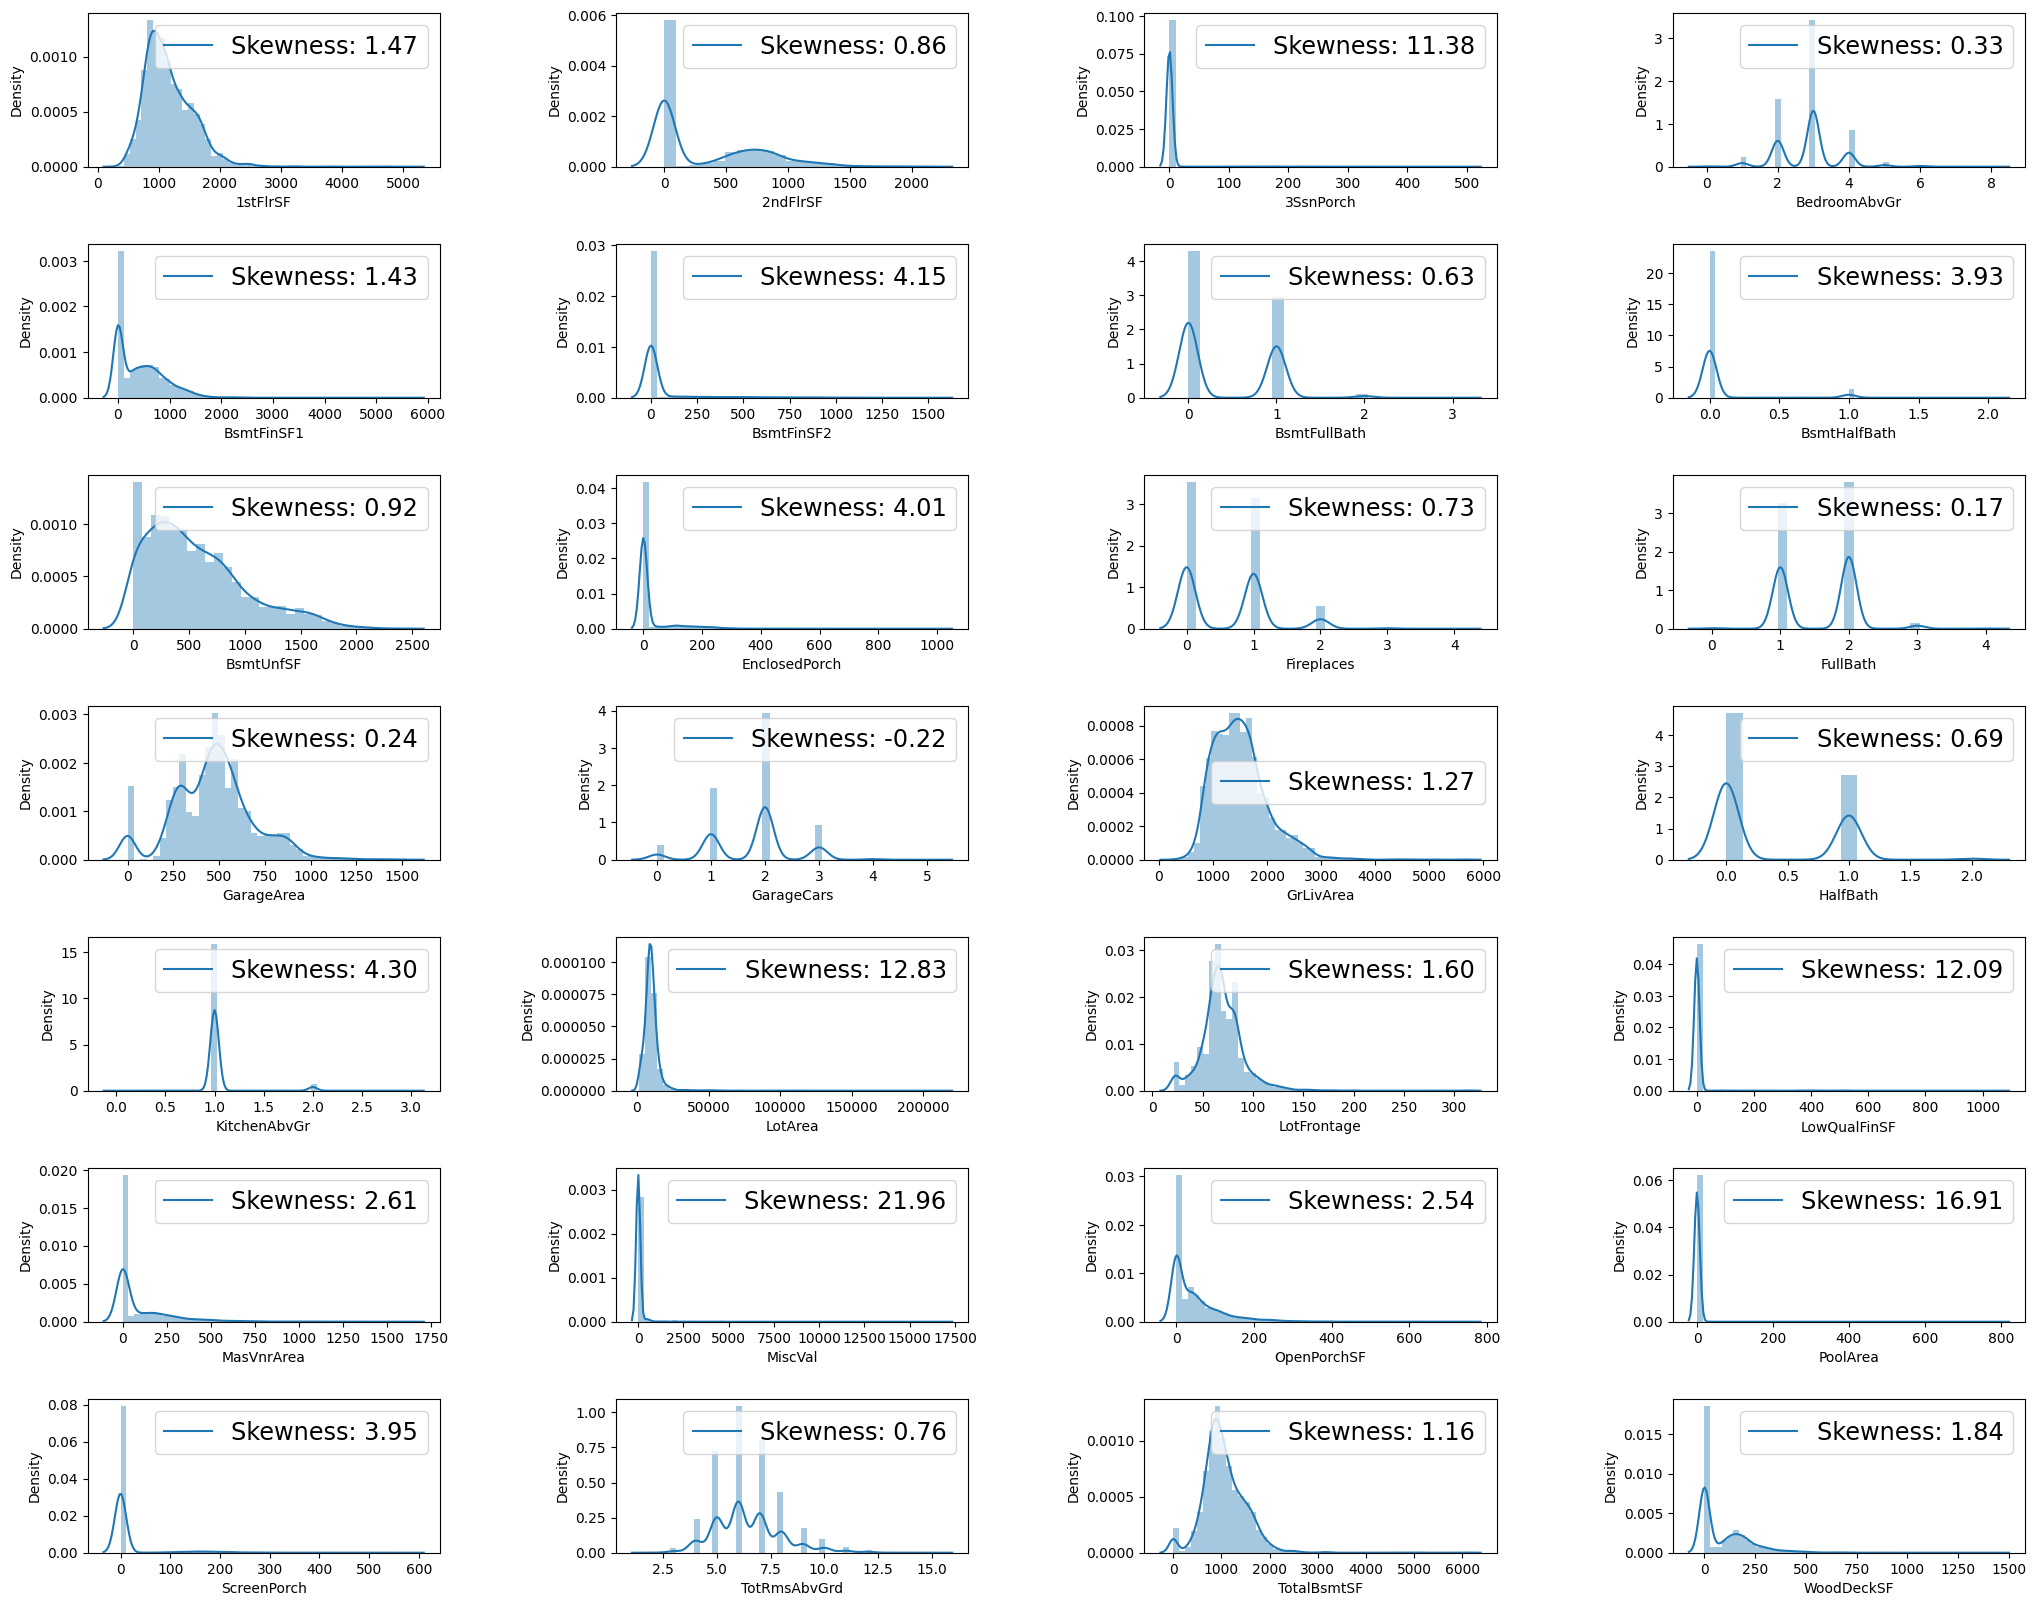

In [83]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i <= 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed_features[i]].skew())], fontsize = 'xx-large')

In [84]:
df_back = df

In [85]:
# decrease the skewnwnes of the data
for i in skewed_features:
    df[i] = np.log(df[i] + 1)

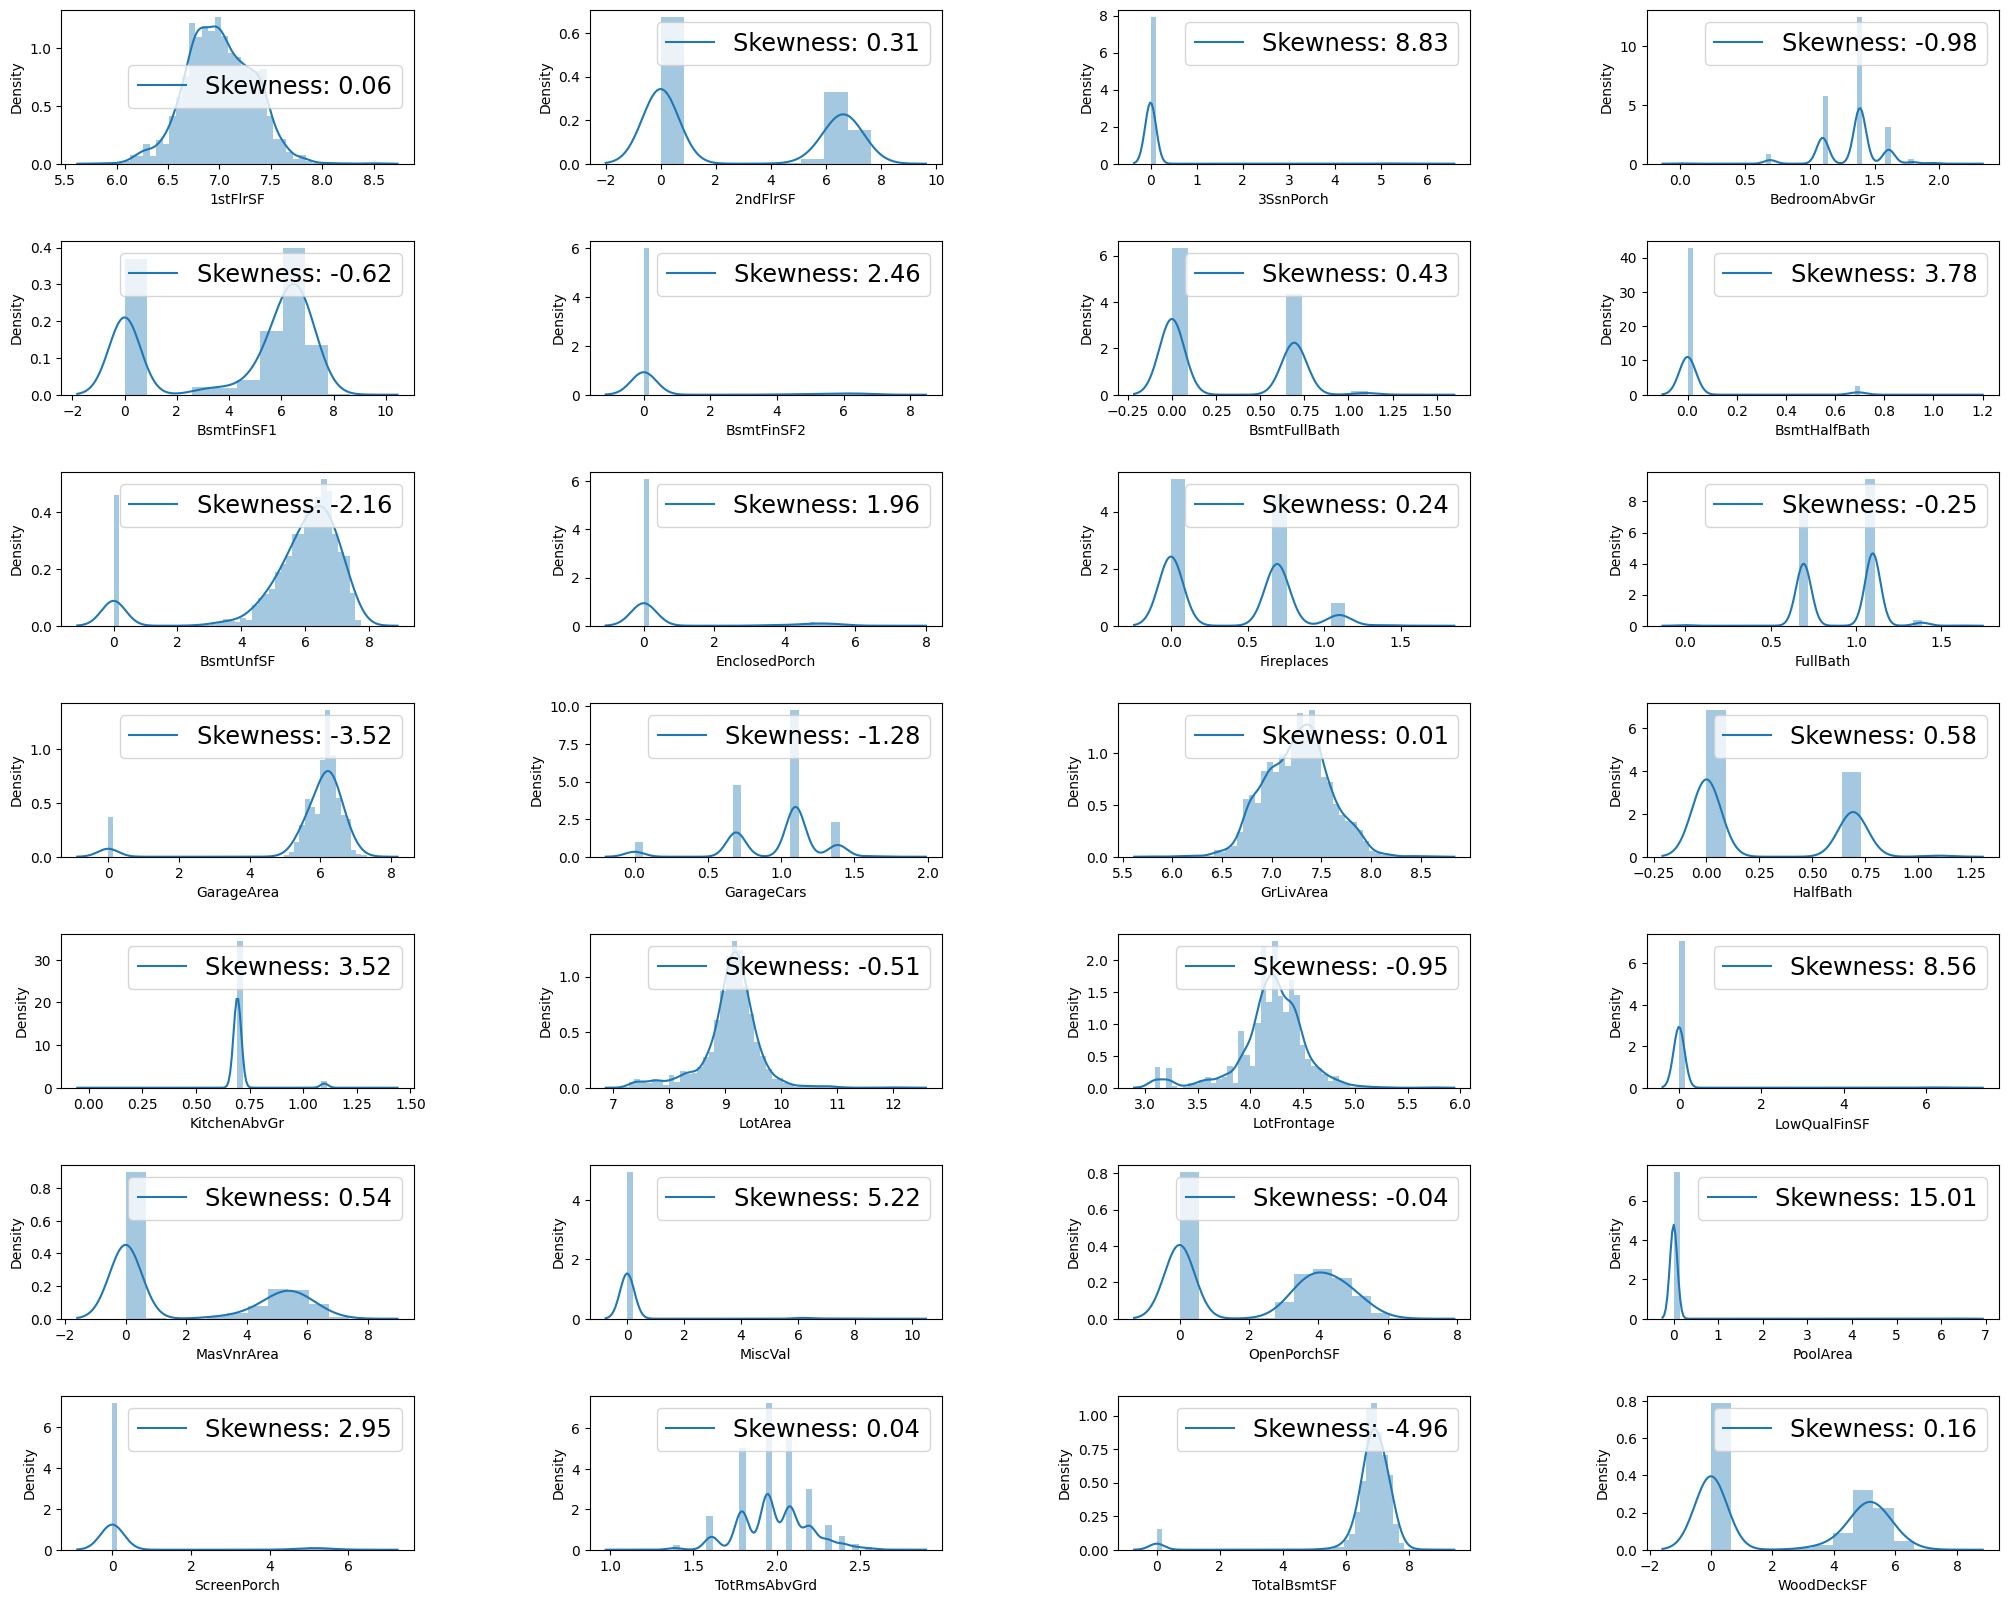

In [86]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i <= 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed_features[i]].skew())], fontsize = 'xx-large')

In [87]:
SalePrice = np.log(df1['SalePrice'] + 1)

In [88]:
# get object feature to conver in numeric using dummy variable
obj_feat = list(df.loc[:,df.dtypes == 'object'].columns.values)
len(obj_feat)

28

In [89]:
# dummy varaibale
dummy_drop = []
clean_df = df
for i in obj_feat:
    dummy_drop += [i + '_' + str(df[i].unique()[-1])]

df = pd.get_dummies(df, columns = obj_feat)
df = df.drop(dummy_drop, axis = 1)

In [90]:
df.shape

(2919, 497)

In [91]:
# scaling dataset with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

**Machine Learning Model Building**

In [92]:
df1_len = len(df1)

In [93]:
X_train = df[:df1_len]
X_test = df[df1_len:]
y_train = SalePrice

print(X_train.shape)
print(X_test.shape)
print(len(y_train))

(1460, 497)
(1459, 497)
1460


**Cross Validation**

In [94]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

**Linear Regression**

In [95]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.7598695040732943]

In [96]:
# Cross validation
cross_validation = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of LR model = ", cross_validation)
print("\nCross validation mean accuracy of LR model = ", cross_validation.mean())

Cross validation accuracy of LR model =  [0.68602997 0.66334589 0.89466644 0.79169826 0.88564474 0.77056972
 0.88099804 0.8699095  0.72316399 0.85238993]

Cross validation mean accuracy of LR model =  0.8018416487931127


In [97]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.864801001893721]

In [98]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8679186126665249]

**Fitting Polynomial Regression to the dataset**

In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression # Import LinearRegression class

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression() # Now you can use the LinearRegression class


**lin_reg_2.fit(X_poly, y_train)
test_model(lin_reg_2,X_poly)** **bold text**

In [100]:
import sklearn.linear_model as linear_model
lin_reg_2 = linear_model.LinearRegression()

**lin_reg_2.fit(X_poly, y_train)**

In [101]:
test_model(lin_reg_2,X_poly)

[0.8258526788794115]

**Support Vector Machine**

In [102]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
test_model(svr_reg)

[0.8465209617696704]

**Decision Tree Regressor**

In [103]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.6742620515700919]

**Random Forest Regressor**

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.8562775459749393]

**Bagging & boosting**

In [105]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)

In [106]:
test_model(br_reg)

[0.8566153126528592]

In [107]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
# Change 'loss' to 'squared_error'
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='squared_error', random_state=51)

In [108]:
test_model(gbr_reg)

[0.88253861446128]

**XGBoost**

In [109]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 64.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [110]:
!pip install xgboost

In [111]:
!pip install scikit-learn==1.0.2

  Using cached scikit-learn-1.0.2.tar.gz (6.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [112]:
import xgboost
#xgb_reg=xgboost.XGBRegressor()
xgb_reg = xgboost.XGBRegressor(booster='gbtree', random_state=51) # Change 'bbooster' to 'booster'
test_model(xgb_reg)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

**SVM Model Bulding**

In [113]:
svr_reg.fit(X_train,y_train)
y_pred = np.exp(svr_reg.predict(X_test)).round(2)

In [114]:
y_pred

array([133451.04, 158501.87, 187636.16, ..., 166256.07, 117354.43,
       249302.42])

In [115]:
submit_df1_1 = pd.concat([df1['Id'],pd.DataFrame(y_pred)], axis=1)
submit_df1_1.columns=['Id', 'SalePrice']

In [116]:
submit_df1_1

Id  SalePrice
0        1  133451.04
1        2  158501.87
2        3  187636.16
3        4  198137.40
4        5  193243.58
5        6  167508.83
6        7  170600.49
7        8  160746.10
8        9  186925.73
9       10  123912.98
10      11  197910.26
11      12   95041.08
12      13   96589.41
13      14  138908.37
14      15  114773.20
15      16  395618.09
16      17  255863.91
17      18  276867.21
18      19  297411.85
19      20  435811.37
20      21  336963.36
21      22  207814.19
22      23  179031.89
23      24  171280.33
24      25  177374.18
25      26  196007.96
26      27  345960.19
27      28  225396.23
28      29  195202.56
29      30  234919.15
30      31  190936.52
31      32   86516.89
32      33  175535.05
33      34  242028.45
34      35  288713.33
35      36  232738.77
36      37  168669.10
37      38  158489.03
38      39  145802.27
39      40  144909.26
40      41  163876.18
41      42  142244.46
42      43  258465.93
43      44  230367.22
44      45  221374.54
45      46  201645.81
46      47  258350.13
47      48  223438.99
48      49  168528.43
49      50  143312.33
50      51  155474.64
51      52  178798.20
52      53  137571.47
53      54  152906.81
54      55  200112.48
55      56  158572.89
56      57  160196.11
57      58  126871.97
58      59  209142.49
59      60  132304.65
60      61  136998.99
61      62  172704.71
62      63  112754.12
63      64  127220.81
64      65  131201.27
65      66  105372.83
66      67  107257.17
67      68  134214.48
68      69  149090.72
69      70  180315.07
70      71  108113.76
71      72   82248.60
72      73  150683.47
73      74  122933.16
74      75  154394.68
75      76  117298.86
76      77   63898.61
77      78  166726.32
78      79  162045.98
79      80  101388.06
80      81  135716.26
81      82  142690.69
82      83  206434.98
83      84   85365.43
84      85  106230.77
85      86  125264.39
86      87  132510.49
87      88  123452.75
88      89  119132.45
89      90  128932.76
90      91   97489.91
91      92  138643.89
92      93  129534.38
93      94  125928.14
94      95  174485.60
95      96   85088.83
96      97   96692.75
97      98  101293.03
98      99   91384.31
99     100  128722.38
100    101  127571.82
101    102  130854.55
102    103  110798.70
103    104  163951.03
104    105  149447.20
105    106  234585.09
106    107   71623.23
107    108  253850.05
108    109  146175.67
109    110  145113.28
110    111  127633.94
111    112  143105.60
112    113  241461.73
113    114  110448.01
114    115  211951.51
115    116  245175.19
116    117  180320.67
117    118  143755.70
118    119  144391.11
119    120  191304.18
120    121  158190.55
121    122  113032.71
122    123  314525.59
123    124  226516.46
124    125  144607.77
125    126   90517.78
126    127   99781.10
127    128  150770.72
128    129  107384.32
129    130  131153.04
130    131   95555.14
131    132  117435.91
132    133  125492.69
133    134   94031.43
134    135   98141.38
135    136  207207.01
136    137  185390.84
137    138  203911.36
138    139  172756.55
139    140  162653.40
140    141   74164.29
141    142  123682.20
142    143   96867.03
143    144  237971.30
144    145  247396.78
145    146  174747.40
146    147  167775.52
147    148  225399.11
148    149  186607.94
149    150  138530.45
150    151  138487.62
151    152  170951.48
152    153  163525.36
153    154  124687.84
154    155  101723.17
155    156   94537.56
156    157   95985.26
157    158  123168.12
158    159  157644.03
159    160  151284.55
160    161  130449.71
161    162  144136.74
162    163  234015.40
163    164  239138.43
164    165  117051.06
165    166  161209.89
166    167  204078.84
167    168  289621.83
168    169  166783.09
169    170  318771.91
170    171  221356.62
171    172  249119.74
172    173  162122.43
173    174  187776.24
174    175  179147.75
175    176  152229.98
176    177  200013.72
177    178  198293.45
178    179  186739.55
179    180  264254.18
180    181  184368.82
181 

In [117]:
svr_reg.fit(X_train,y_train)
y_pred = np.exp(svr_reg.predict(X_test)).round(2)
submit_df1 = pd.concat([df1['Id'],pd.DataFrame(y_pred)], axis=1)
submit_df1_1.columns=['Id', 'SalePrice']
submit_df1.to_csv('sample_submission.csv', index=False)
submit_df1


Id          0
0        1  133451.04
1        2  158501.87
2        3  187636.16
3        4  198137.40
4        5  193243.58
5        6  167508.83
6        7  170600.49
7        8  160746.10
8        9  186925.73
9       10  123912.98
10      11  197910.26
11      12   95041.08
12      13   96589.41
13      14  138908.37
14      15  114773.20
15      16  395618.09
16      17  255863.91
17      18  276867.21
18      19  297411.85
19      20  435811.37
20      21  336963.36
21      22  207814.19
22      23  179031.89
23      24  171280.33
24      25  177374.18
25      26  196007.96
26      27  345960.19
27      28  225396.23
28      29  195202.56
29      30  234919.15
30      31  190936.52
31      32   86516.89
32      33  175535.05
33      34  242028.45
34      35  288713.33
35      36  232738.77
36      37  168669.10
37      38  158489.03
38      39  145802.27
39      40  144909.26
40      41  163876.18
41      42  142244.46
42      43  258465.93
43      44  230367.22
44      45  221374.54
45      46  201645.81
46      47  258350.13
47      48  223438.99
48      49  168528.43
49      50  143312.33
50      51  155474.64
51      52  178798.20
52      53  137571.47
53      54  152906.81
54      55  200112.48
55      56  158572.89
56      57  160196.11
57      58  126871.97
58      59  209142.49
59      60  132304.65
60      61  136998.99
61      62  172704.71
62      63  112754.12
63      64  127220.81
64      65  131201.27
65      66  105372.83
66      67  107257.17
67      68  134214.48
68      69  149090.72
69      70  180315.07
70      71  108113.76
71      72   82248.60
72      73  150683.47
73      74  122933.16
74      75  154394.68
75      76  117298.86
76      77   63898.61
77      78  166726.32
78      79  162045.98
79      80  101388.06
80      81  135716.26
81      82  142690.69
82      83  206434.98
83      84   85365.43
84      85  106230.77
85      86  125264.39
86      87  132510.49
87      88  123452.75
88      89  119132.45
89      90  128932.76
90      91   97489.91
91      92  138643.89
92      93  129534.38
93      94  125928.14
94      95  174485.60
95      96   85088.83
96      97   96692.75
97      98  101293.03
98      99   91384.31
99     100  128722.38
100    101  127571.82
101    102  130854.55
102    103  110798.70
103    104  163951.03
104    105  149447.20
105    106  234585.09
106    107   71623.23
107    108  253850.05
108    109  146175.67
109    110  145113.28
110    111  127633.94
111    112  143105.60
112    113  241461.73
113    114  110448.01
114    115  211951.51
115    116  245175.19
116    117  180320.67
117    118  143755.70
118    119  144391.11
119    120  191304.18
120    121  158190.55
121    122  113032.71
122    123  314525.59
123    124  226516.46
124    125  144607.77
125    126   90517.78
126    127   99781.10
127    128  150770.72
128    129  107384.32
129    130  131153.04
130    131   95555.14
131    132  117435.91
132    133  125492.69
133    134   94031.43
134    135   98141.38
135    136  207207.01
136    137  185390.84
137    138  203911.36
138    139  172756.55
139    140  162653.40
140    141   74164.29
141    142  123682.20
142    143   96867.03
143    144  237971.30
144    145  247396.78
145    146  174747.40
146    147  167775.52
147    148  225399.11
148    149  186607.94
149    150  138530.45
150    151  138487.62
151    152  170951.48
152    153  163525.36
153    154  124687.84
154    155  101723.17
155    156   94537.56
156    157   95985.26
157    158  123168.12
158    159  157644.03
159    160  151284.55
160    161  130449.71
161    162  144136.74
162    163  234015.40
163    164  239138.43
164    165  117051.06
165    166  161209.89
166    167  204078.84
167    168  289621.83
168    169  166783.09
169    170  318771.91
170    171  221356.62
171    172  249119.74
172    173  162122.43
173    174  187776.24
174    175  179147.75
175    176  152229.98
176    177  200013.72
177    178  198293.45
178    179  186739.55
179    180  264254.18
180    181  184368.82
181 

**Model Save**

In [118]:
import pickle

pickle.dump(svr_reg, open('model_house_price_prediction.csv', 'wb'))
model_house_price_prediction = pickle.load(open('model_house_price_prediction.csv', 'rb'))
model_house_price_prediction.predict(X_test)

array([11.80148992, 11.97352169, 12.14226005, ..., 12.02128447,
       11.67295391, 12.42642198])

In [119]:
test_model(model_house_price_prediction)

[0.8465209617696704]